# Project - Predicting the amount of product purchase


## PROBLEM STATEMENT:
      
To predict the amount of purchases in Retail shop using Machine Learning algorithms


## Importing the necessary packages and modules

- <b>numpy</b> package can be used to perform mathematical operations like 'mean'.
- <b>pandas</b> package can be used to process dataframes.
- <b>seaborn</b> package can be used to visualise data in the form of various effective graphs and plots.
- <b>sklearn</b> is the main package which is used for machine learning.
- <b>LabelEncoder</b> is used to encode the non-numeric data into numericals so that machine learning model can be built.
- <b>train_test_split module</b> is used to split the data into training and testing sets.
- <b>LinearRegression</b> module is used to fit a LinearRegression model.
- <b>sklearn.metrics</b> can be used to calculate statistical results like mean squared error, root mean squared error, etc.

In [1]:
import numpy as np
import pandas as pd
import seaborn as seb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import r2_score
%matplotlib inline

## Reading the dataset
- The <b>dataset</b> needs to be imported and read - we use <b>pandas</b> to acheive this.

In [2]:
train_data = pd.read_csv('newcsv.csv')
train_data.head(5)

Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 5.0                 NaN   
1               0                   1                 6.0                14.0   
2               0                  12                25.0                 NaN   
3               0                  12                14.0                 NaN   
4               0                   8                 NaN                 NaN   

   Purchase  
0      8370  
1     15200  
2      1422  
3      1057  
4      7969

In [3]:
train_data.shape

(1042, 10)

## Processing the dataset
- After the data has been imported, we have to <b>clean/preprocess</b> the data to actually fit into a <b>regression</b> model

#### 1. Checking for missing entries

In [4]:
train_data.isnull().sum()

Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Stay_In_Current_City_Years      0
Marital_Status                  0
Product_Category_1              0
Product_Category_2            637
Product_Category_3            957
Purchase                        0
dtype: int64

#### 2. Filling the missing entries with 0 and checking for null entries

In [5]:
train_data = train_data.apply(lambda x : x.fillna(x.value_counts().index[0]))
train_data.isnull().sum()  # checking for null/missing values again

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### 3. Encoding the data set so as to make it easy for building machine learning model
- The original data has <b>non-numerical</b> entries for few columns
- We encode these non-numerical entries using <b>LabelEncoder</b>

In [6]:
label_enc = LabelEncoder()
data_enc = train_data

# encoding few string-contained columns
#data_enc.Product_ID = label_enc.fit_transform(train_data.Product_ID)
data_enc.Gender = label_enc.fit_transform(train_data.Gender)
data_enc.Age = label_enc.fit_transform(train_data.Age)
data_enc.City_Category = label_enc.fit_transform(train_data.City_Category)
data_enc.Stay_In_Current_City_Years = label_enc.fit_transform(train_data.Stay_In_Current_City_Years)

data_enc.head(10)



Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0       0    1          10              0                           1   
1       0    1          10              0                           1   
2       0    1          10              0                           1   
3       0    1          10              0                           1   
4       1   15          16              2                           3   
5       1    7          15              0                           2   
6       1   11           7              1                           1   
7       1   11           7              1                           1   
8       1   11           7              1                           1   
9       1    7          20              0                           0   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 5.0                17.0   
1               0                   1                 6.0                14.0   
2               0                  12                25.0                17.0   
3               0                  12                14.0                17.0   
4               0                   8                14.0                17.0   
5               0                   1                 2.0                17.0   
6               1                   1                 8.0                17.0   
7               1                   1                15.0                17.0   
8               1                   1                16.0                17.0   
9               1                   8                14.0                17.0   

   Purchase  
0      8370  
1     15200  
2      1422  
3      1057  
4      7969  
5     15227  
6     19215  
7     15854  
8     15686  
9      7871

#### Finding the correlation using corr()

In [7]:
train_data.corr()

Gender       Age  Occupation  City_Category  \
Gender                      1.000000  0.519911   -0.053010       0.103500   
Age                         0.519911  1.000000   -0.113206       0.687804   
Occupation                 -0.053010 -0.113206    1.000000      -0.215305   
City_Category               0.103500  0.687804   -0.215305       1.000000   
Stay_In_Current_City_Years -0.032396  0.177700   -0.165767       0.085758   
Marital_Status              0.208419  0.362231    0.192765       0.232616   
Product_Category_1         -0.063308  0.104403   -0.365562       0.467277   
Product_Category_2         -0.081121  0.032713   -0.173327       0.220323   
Product_Category_3          0.269265  0.313784   -0.059528       0.275993   
Purchase                    0.214866  0.096376    0.236972      -0.298664   

                            Stay_In_Current_City_Years  Marital_Status  \
Gender                                       -0.032396        0.208419   
Age                                           0.177700        0.362231   
Occupation                                   -0.165767        0.192765   
City_Category                                 0.085758        0.232616   
Stay_In_Current_City_Years                    1.000000       -0.250692   
Marital_Status                               -0.250692        1.000000   
Product_Category_1                            0.074246       -0.248994   
Product_Category_2                           -0.041377        0.037498   
Product_Category_3                            0.043461        0.147635   
Purchase                                     -0.026546        0.312651   

                            Product_Category_1  Product_Category_2  \
Gender                               -0.063308           -0.081121   
Age                                   0.104403            0.032713   
Occupation                           -0.365562           -0.173327   
City_Category                         0.467277            0.220323   
Stay_In_Current_City_Years            0.074246           -0.041377   
Marital_Status                       -0.248994            0.037498   
Product_Category_1                    1.000000            0.434820   
Product_Category_2                    0.434820            1.000000   
Product_Category_3                    0.305197            0.333514   
Purchase                             -0.932177           -0.497053   

                            Product_Category_3  Purchase  
Gender                                0.269265  0.214866  
Age                                   0.313784  0.096376  
Occupation                           -0.059528  0.236972  
City_Category                         0.275993 -0.298664  
Stay_In_Current_City_Years            0.043461 -0.026546  
Marital_Status                        0.147635  0.312651  
Product_Category_1                    0.305197 -0.932177  
Product_Category_2                    0.333514 -0.497053  
Product_Category_3                    1.000000 -0.325785  
Purchase                             -0.325785  1.000000

### visualizing the correlation

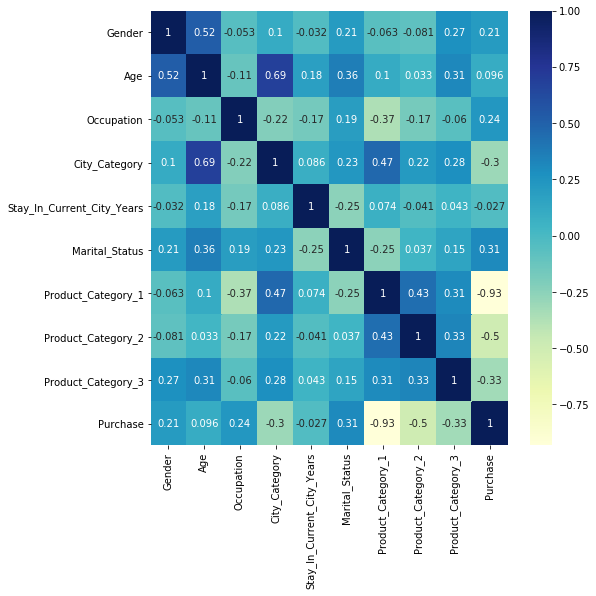

In [8]:
plt.figure(figsize=(8,8))
seb.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

## Declaring input and output variables
- Input variables are considered as all the columns except the Purchase column
- Output variables are considered as the last column, i.e, the Purchase column

In [9]:
X=train_data.drop(['Purchase'],axis=1)
y=train_data.Purchase

## Splitting the data into train and test sets
- Input train and test sets are 2 dimensional
- Output train and test sets are 1 dimensional

In [10]:
#divide the X and y into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(781, 9)
(261, 9)
(781,)
(261,)


## Fitting the data into Linear Regression model

In [11]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### intercept and coefficient values

In [12]:
print(lm.intercept_)
lm.coef_

34227.62355646094


array([ 1573.77223205,   119.67897428,  -112.16073699,   665.08421239,
         138.37301683,   834.26343855,  -754.63206759,  -130.59737103,
       -1191.2880581 ])

### creating a dataframe for cofficients

In [13]:
coefficients=pd.DataFrame([X_train.columns,lm.coef_]).T
coefficients

0        1
0                      Gender  1573.77
1                         Age  119.679
2                  Occupation -112.161
3               City_Category  665.084
4  Stay_In_Current_City_Years  138.373
5              Marital_Status  834.263
6          Product_Category_1 -754.632
7          Product_Category_2 -130.597
8          Product_Category_3 -1191.29

### checking the model prediction on training data

In [14]:
y_train_pred = lm.predict(X_train)
y_train_pred

array([  885.9633546 , 14874.37302266,  -758.71154435, 15147.81907054,
        -141.55055902,   -48.50400674,   396.90151541,   516.58048969,
       15004.9703937 ,  9429.97936335, 10195.28813211,  9429.97936335,
        -141.55055902, 15147.81907054,   793.32652335,  -716.81632926,
       15004.9703937 ,  1159.60651074,   781.3208549 ,  7112.88058444,
         791.65210316, -2123.28557651, 13965.75979   ,  1020.67880346,
       15267.49804482, 15919.15199093, 13965.75979   ,  -754.80202078,
        -836.49530354,  -261.2295333 ,   673.64754907,  -836.49530354,
        9768.5689003 ,  -414.7978956 ,  2108.54421025,  -141.55055902,
       -2123.28557651,  2108.54421025, 10195.28813211, 15919.15199093,
        2614.32301203, 10434.64608067, 14874.37302266,   396.90151541,
       -2123.28557651,  7112.88058444, 15267.49804482,   396.90151541,
         673.64754907, 13965.75979   , 15004.9703937 ,  -758.71154435,
       13965.75979   , 14874.37302266,  -754.80202078, 10434.64608067,
      

### comparing the actual values(y_train) and the predicted values(y_train_pred)

In [15]:
y_train==y_train_pred

974     False
967     False
568     False
951     False
236     False
        ...  
1033    False
763     False
835     False
559     False
684     False
Name: Purchase, Length: 781, dtype: bool

In [16]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_train,y_train_pred))
print("Adjusted R^2:",1-(1-r2_score(y_train,y_train_pred))*(len(X_train)-1)/
     (len(X_train)-X_train.shape[1]-1))

R^2: 0.9421729257887193
Adjusted R^2: 0.9414979015761362


### regplot

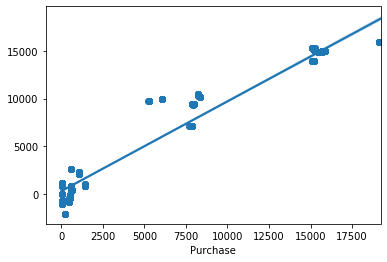

In [17]:
seb.regplot(y_train,y_train_pred)

###  Visualizing the differences between acutal values and predicted values

Text(0, 0.5, 'model predicted purchase')

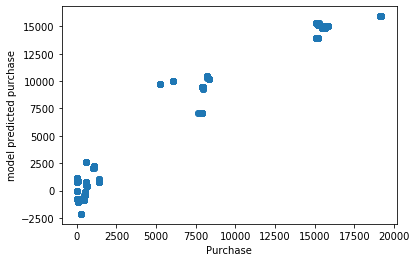

In [18]:
plt.scatter(y_train,y_train_pred)
plt.xlabel('Purchase')
plt.ylabel('model predicted purchase')

### plot for residuals(errors)
-  y_train-y_train_pred=Errors

Text(0, 0.5, 'errors')

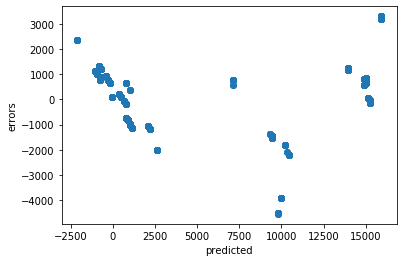

In [19]:
plt.scatter(y_train_pred,y_train-y_train_pred)
plt.xlabel("predicted")
plt.ylabel("errors")

### Predicting the output test values for input test values

In [20]:
y_test_pred=lm.predict(X_test)
y_test_pred

array([ -836.49530354,  1039.92753646,  1159.60651074,   791.65210316,
        9768.5689003 ,   396.90151541, 15004.9703937 , 15919.15199093,
        9429.97936335,  9429.97936335,  9429.97936335, 15267.49804482,
        -758.71154435, -1080.36969776,  9998.26285247,   781.3208549 ,
       15919.15199093,  1020.67880346,  9429.97936335, -1080.36969776,
         396.90151541,  1039.92753646,  -758.71154435, 15147.81907054,
       -2123.28557651, 15147.81907054,   791.65210316,  -836.49530354,
         791.65210316, 15004.9703937 , 10195.28813211,  -261.2295333 ,
        7112.88058444,   885.9633546 ,   516.58048969, 13965.75979   ,
        -960.69072348, 15267.49804482,   -48.50400674,  9768.5689003 ,
        9998.26285247,  -758.71154435,  9429.97936335,  -754.80202078,
        2108.54421025,  -758.71154435,  9768.5689003 ,   781.3208549 ,
        2614.32301203,  1159.60651074,  2108.54421025, -2123.28557651,
        -758.71154435,   885.9633546 , 14874.37302266,  2108.54421025,
      

### Comparing the actual output test values with the predicted output test values
- returning boolean values while comparing the output test values with predicted output test values

In [21]:
y_test==y_test_pred

764    False
214    False
889    False
634    False
650    False
       ...  
37     False
944    False
158    False
40     False
359    False
Name: Purchase, Length: 261, dtype: bool

### Visualising the data for the actual values vs. the predicted values

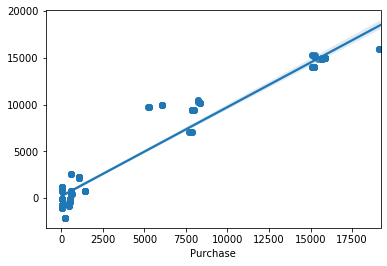

In [22]:
seb.regplot(y_test, y_test_pred)

#### Visualizing the differences between acutal values and predicted values

Text(0, 0.5, 'Model Predicted Price')

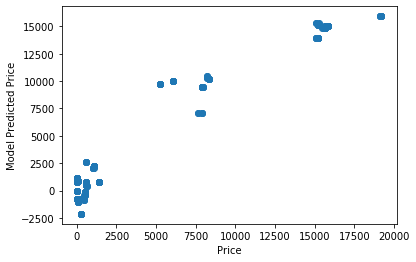

In [23]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Price')
plt.ylabel('Model Predicted Price')

#### plot for residuals(errors)

Text(0, 0.5, 'errors')

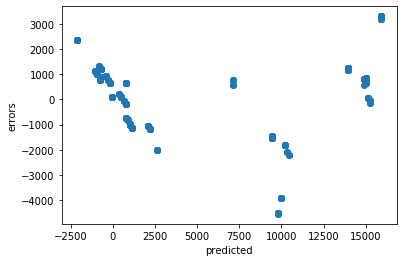

In [24]:
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.xlabel("predicted")
plt.ylabel("errors")

### Statistical Results

In [25]:
difference = np.mean(y_test) - np.mean(y_test_pred)
error = (np.mean(y_test) - np.mean(y_test_pred))/np.mean(y_test)

print('Predicted Mean : %.2f' % np.mean(y_test_pred), end = '\n\n')
print('Actual Mean : %.2f' % np.mean(y_test), end = '\n\n')
print('Difference : %.2f' % difference, end = '\n\n')
print('Coefficients :')
print(lm.coef_, end = '\n\n')
print('Variance score: %.4f' % lm.score(X_test, y_test), end = '\n\n')  
print('Percentage Error : %.4f' % (error*100), end = '\n\n')

Predicted Mean : 4510.03

Actual Mean : 4521.18

Difference : 11.15

Coefficients :
[ 1573.77223205   119.67897428  -112.16073699   665.08421239
   138.37301683   834.26343855  -754.63206759  -130.59737103
 -1191.2880581 ]

Variance score: 0.9368

Percentage Error : 0.2466



### Error Metrics
1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error
### Performance Metrics
1. R^2 value
2. Adjusted R^2 value

In [26]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("R^2:",r2_score(y_test,y_test_pred))
print("Adjusted R^2:",1-(1-r2_score(y_test,y_test_pred))*(len(X_test)-1)/
     (len(X_test)-X_test.shape[1]-1))
print("MAE:",mean_absolute_error(y_test,y_test_pred))
print("MSE:",mean_squared_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_test_pred)))

R^2: 0.9367980427500978
Adjusted R^2: 0.9345318371116551
MAE: 1224.22849404367
MSE: 2504767.792162472
RMSE: 1582.6458201892399


## scaling

In [27]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_X_train

#Scaling for test data
#Testing the data based on training data
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_test

Gender       Age  Occupation  City_Category  \
0    0.716635 -0.423797    1.192220       0.010682   
1   -1.395410  1.046161   -0.230701       1.401146   
2   -1.395410  1.291154   -0.230701       1.401146   
3   -1.395410 -1.648762    0.302894      -1.379781   
4    0.716635 -0.178804    2.081545      -1.379781   
..        ...       ...         ...            ...   
256  0.716635 -0.913783   -0.764296       0.010682   
257  0.716635  0.311182   -1.297891       0.010682   
258 -1.395410 -0.913783   -0.764296       0.010682   
259 -1.395410  1.046161   -0.230701       1.401146   
260  0.716635  0.311182   -1.297891       0.010682   

     Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                     -1.098127        1.337642            0.908611   
1                      1.543467        1.337642            0.781118   
2                      1.543467        1.337642            0.781118   
3                     -0.217596       -0.747584           -0.111332   
4                     -1.098127        1.337642           -1.003782   
..                          ...             ...                 ...   
256                    1.543467       -0.747584            0.908611   
257                    1.543467       -0.747584            0.908611   
258                    1.543467       -0.747584            0.781118   
259                    1.543467        1.337642            0.781118   
260                   -0.217596       -0.747584            0.908611   

     Product_Category_2  Product_Category_3  
0              0.185868            0.206697  
1              0.185868            0.206697  
2              0.185868            0.206697  
3              2.728530            0.206697  
4             -0.507585            0.206697  
..                  ...                 ...  
256            0.185868            0.206697  
257            0.185868            0.206697  
258            0.185868            0.206697  
259            0.185868            0.206697  
260            0.185868            0.206697  

[261 rows x 9 columns]

In [28]:
# Model Building:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=40, metric='euclidean')

# Apply the knn object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
knn.fit(scaled_X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                    weights='uniform')

In [29]:
# Predictions on the data
#predict function--> gives the predicted values
# Syntax:objectname.predict(Input)
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array([   45.725, 15653.3  ,   119.9  , 13822.175,   495.   ,   282.65 ,
         609.2  ,   608.75 , 15761.95 ,  7743.7  ,  6508.45 ,  7743.7  ,
         495.   , 13822.175,   606.   ,   477.5  , 15761.95 ,    68.325,
          45.725,  6365.775,  1410.325,   177.675, 13455.725,    28.225,
       13814.775, 18754.575, 13455.725,   177.675,   477.6  ,   495.   ,
         606.   ,   477.6  ,  6365.775,   276.175,  1966.575,   495.   ,
         177.675,  1966.575,  6508.45 , 18754.575,   600.2  ,  6508.45 ,
       15653.3  ,   609.2  ,   177.675,  6365.775, 13814.775,   609.2  ,
         606.   , 13455.725, 15761.95 ,   119.9  , 13455.725, 15653.3  ,
         177.675,  6508.45 , 13822.175,   609.2  ,   608.75 ,   477.6  ,
        1966.575, 18754.575,   282.65 ,   606.   ,  1966.575,   282.65 ,
         177.675,   276.175,  1410.325,   606.   ,  6365.775,   276.175,
        6365.775,   159.425,  1410.325,  1966.575,   276.175,   606.   ,
       18754.575, 13822.175, 18754.575, 13822.175, 

## Implementing knn regressor

In [42]:
# Checking for optimum k-value
# Build the models with multiple k values
scores=[]
for k in range(1, 20):
    knn_model = KNeighborsRegressor(n_neighbors = k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(mean_squared_error(y_test, pred_test))
scores

[1855.1379310344828,
 1509.132183908046,
 1403.578118348234,
 1330.157327586207,
 1346.5788505747157,
 1285.4681779480636,
 1321.741652983035,
 1373.6652298850574,
 1350.830850007095,
 1369.4324904214577,
 1342.620594661346,
 1389.070029799917,
 1325.5448321204292,
 1328.203104230202,
 1336.6521243082161,
 1329.647973539272,
 1339.5240557345332,
 9244.625289721389,
 29783.16143959416]

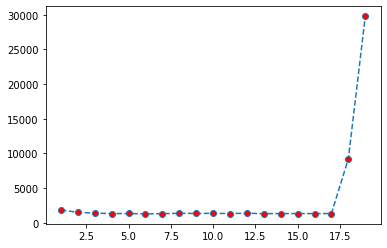

In [44]:
# Plottting of K values and Scores
plt.plot(range(1,20), scores, marker='o', markerfacecolor='r', linestyle='--')

In [45]:
# Optimum k value is 19
final_model = KNeighborsRegressor(n_neighbors=19, metric='euclidean')
final_model.fit(scaled_X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='uniform')

In [46]:
# Prediction on  training data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array([6.00000000e+01, 1.56344211e+04, 1.40000000e+01, 1.52000000e+04,
       4.95000000e+02, 4.97368421e+01, 6.17157895e+02, 6.02000000e+02,
       1.57946316e+04, 7.94342105e+03, 8.37000000e+03, 7.94342105e+03,
       4.95000000e+02, 1.52000000e+04, 6.06000000e+02, 4.76000000e+02,
       1.57946316e+04, 2.40000000e+01, 3.91578947e+01, 7.84942105e+03,
       1.42173684e+03, 2.36947368e+02, 1.51835263e+04, 2.50000000e+01,
       1.51751053e+04, 1.91823684e+04, 1.51835263e+04, 1.18000000e+02,
       4.79368421e+02, 4.95000000e+02, 6.06000000e+02, 4.79368421e+02,
       5.25063158e+03, 4.94105263e+02, 1.04742105e+03, 4.95000000e+02,
       2.36947368e+02, 1.04742105e+03, 8.37000000e+03, 1.91823684e+04,
       5.99000000e+02, 8.29989474e+03, 1.56344211e+04, 6.17157895e+02,
       2.36947368e+02, 7.84942105e+03, 1.51751053e+04, 6.17157895e+02,
       6.06000000e+02, 1.51835263e+04, 1.57946316e+04, 1.40000000e+01,
       1.51835263e+04, 1.56344211e+04, 1.18000000e+02, 8.29989474e+03,
      

In [47]:
print(r2_score(y_train, final_train_pred))

0.9994091884072308


In [48]:
# Predictions on Test Data
final_test_pred = final_model.predict(scaled_X_test)  # y_test
final_test_pred

array([4.79368421e+02, 2.65263158e+01, 2.40000000e+01, 1.42173684e+03,
       5.25063158e+03, 6.17157895e+02, 1.57946316e+04, 1.91823684e+04,
       7.94342105e+03, 7.94342105e+03, 7.94342105e+03, 1.51751053e+04,
       1.40000000e+01, 6.20000000e+01, 7.10973684e+03, 3.91578947e+01,
       1.91823684e+04, 2.50000000e+01, 7.94342105e+03, 6.20000000e+01,
       6.17157895e+02, 2.65263158e+01, 1.40000000e+01, 1.52000000e+04,
       2.36947368e+02, 1.52000000e+04, 1.42173684e+03, 4.79368421e+02,
       1.42173684e+03, 1.57946316e+04, 8.37000000e+03, 4.95000000e+02,
       7.84942105e+03, 6.00000000e+01, 6.02000000e+02, 1.51835263e+04,
       6.20000000e+01, 1.51751053e+04, 4.97368421e+01, 5.25063158e+03,
       7.10973684e+03, 1.40000000e+01, 7.94342105e+03, 1.18000000e+02,
       1.04742105e+03, 1.40000000e+01, 5.25063158e+03, 3.91578947e+01,
       5.99000000e+02, 2.40000000e+01, 1.04742105e+03, 2.36947368e+02,
       1.40000000e+01, 6.00000000e+01, 1.56344211e+04, 1.04742105e+03,
      

In [49]:
print(r2_score(y_test, final_test_pred))

0.9992484915759609


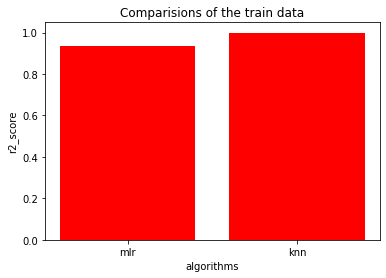

In [56]:
algorithms=['mlr','knn'] 
r2_score=[0.9723944166171743,0.9994091884072308] 
plt.bar(sub,students,color="red") 
plt.xlabel("algorithms")
plt.ylabel("r2_score")
plt.title('Comparisions of the train data')
plt.show()

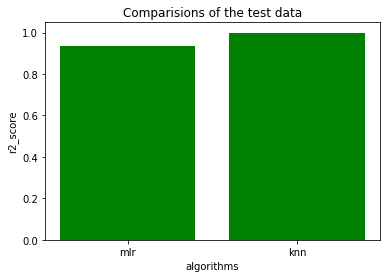

In [54]:
algorithms=['mlr','knn'] 
r2_score=[0.9367980427500978,0.9992484915759609] 
plt.bar(sub,students,color="green") 
plt.xlabel("algorithms")
plt.ylabel("r2_score")
plt.title('Comparisions of the test data')
plt.show()

### CONCLUSION:FROM THE ABOVE GRAPH WE CAN CONCLUDE THAT KNN REGRESSOR IS THE BEST ALGORITHM WITH 99% ACCURACY
